## Environment Setup

This notebook requires additional Python packages.  
The following cell installs all required dependencies to ensure reproducibility when running in Google Colab or a fresh environment.


In [4]:
# Install required libraries (
!pip install statsmodels xgboost


This section imports the core Python libraries required for data analysis, visualization, and model development.  
Each library serves a specific purpose in the machine learning workflow, from data handling to evaluation.

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split


## Loading the Dataset

The dataset is loaded into a Pandas DataFrame for analysis.  
At this stage, the goal is to verify that the data is imported correctly and to inspect its basic structure.


In [6]:

url = "https://hastie.su.domains/Papers/LARS/diabetes.data"

df = pd.read_csv(url, sep="\s+", engine="python")
df.to_csv("diabetes.csv", index=False)

df.head()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3849462742.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(url, sep="\s+", engine="python")


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


## Initial Data Exploration

This step provides a high-level overview of the dataset, including:
- Number of rows and columns  
- Data types of features  
- Presence of missing or invalid values  

Understanding the dataset early helps guide preprocessing and modeling decisions.


1. getting information about the columns of the dataset



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


2. Getting the number of rows and columns

In [8]:
df.shape

(442, 11)

3. check if there are null values in any column

In [9]:
df.isnull().sum()

,0
AGE,0
SEX,0
BMI,0
BP,0
S1,0
S2,0
S3,0
S4,0
S5,0
S6,0


4. check the summary statistics - quick check

In [10]:
df.describe()


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis is performed to understand the distribution and relationships within the data.  
This includes summary statistics and visual inspection where applicable.

EDA helps identify patterns, anomalies, and potential assumptions for regression modeling.


Analyzing the feature distribution using histogram

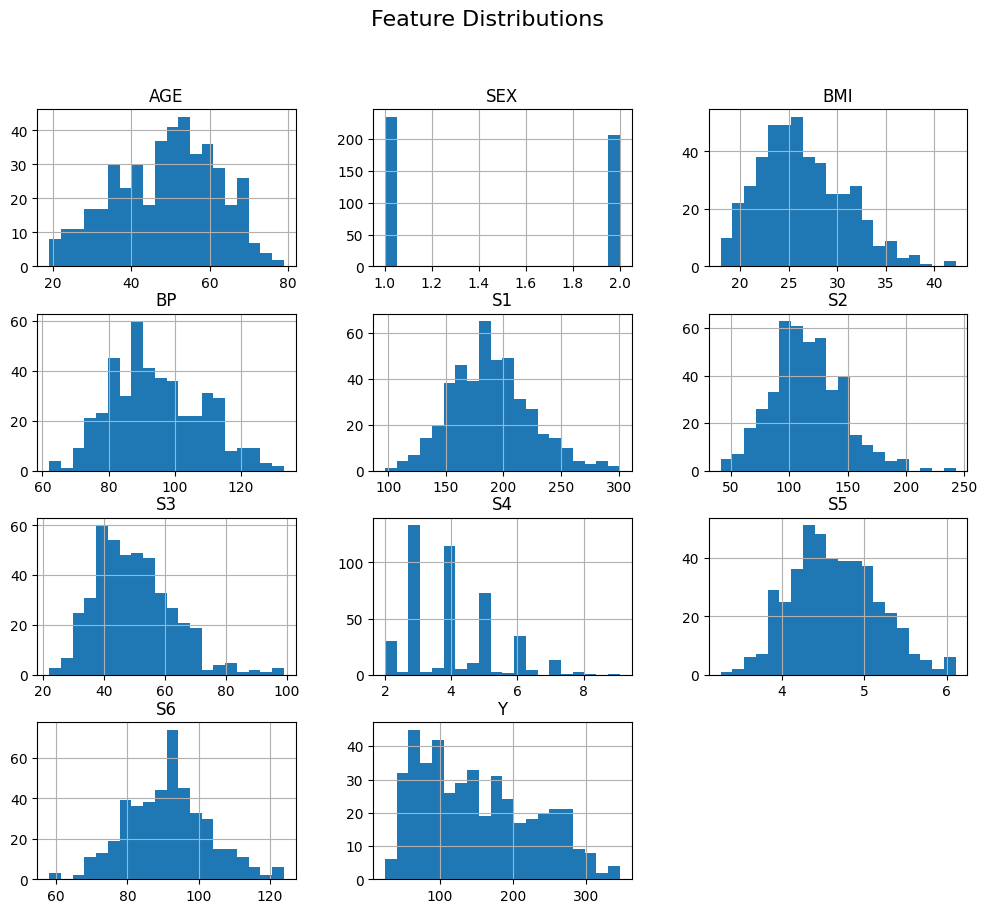

In [11]:


df.hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


Use box plot to pick the outliers

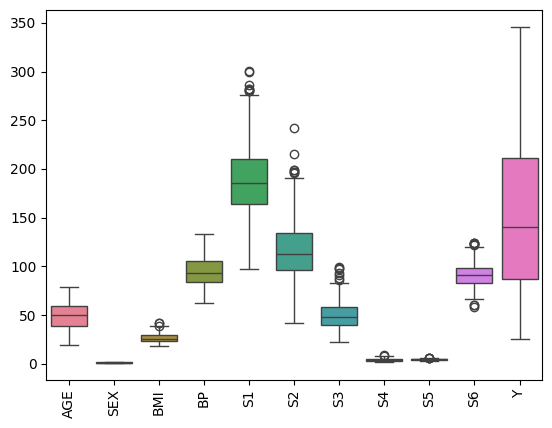

In [12]:
# box plot visualization


sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


Outlier detection for each column

In [13]:
# outliers detection

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

outliers.sum()   # number of outliers per column


,0
AGE,0
SEX,0
BMI,3
BP,0
S1,8
S2,7
S3,7
S4,2
S5,4
S6,9


In [14]:

#looping through columns to display outliers

for col in df.columns:
    print(f"\n--- Outliers in {col} ---")
    vals = df.loc[outliers[col], col]
    for i, val in vals.items():
        print(f"Index {i}: {val}")



--- Outliers in AGE ---

--- Outliers in SEX ---

--- Outliers in BMI ---
Index 256: 41.3
Index 366: 39.1
Index 367: 42.2

--- Outliers in BP ---

--- Outliers in S1 ---
Index 123: 300
Index 161: 286
Index 202: 281
Index 230: 301
Index 248: 282
Index 276: 280
Index 287: 280
Index 346: 282

--- Outliers in S2 ---
Index 123: 242.4
Index 161: 199.4
Index 230: 215.0
Index 248: 197.2
Index 287: 195.4
Index 346: 196.8
Index 376: 198.6

--- Outliers in S3 ---
Index 35: 86.0
Index 58: 99.0
Index 260: 91.0
Index 261: 98.0
Index 269: 93.0
Index 286: 88.0
Index 441: 97.0

--- Outliers in S4 ---
Index 123: 9.09
Index 322: 8.28

--- Outliers in S5 ---
Index 23: 6.107
Index 169: 6.107
Index 322: 6.1048
Index 353: 6.0936

--- Outliers in S6 ---
Index 23: 124
Index 84: 60
Index 117: 124
Index 141: 123
Index 168: 122
Index 245: 60
Index 350: 124
Index 406: 58
Index 428: 123

--- Outliers in Y ---


## Feature Selection

Relevant input features are selected based on domain understanding and data availability.  
Selecting appropriate features improves model interpretability and reduces noise in predictions.


1.Correlation matrix

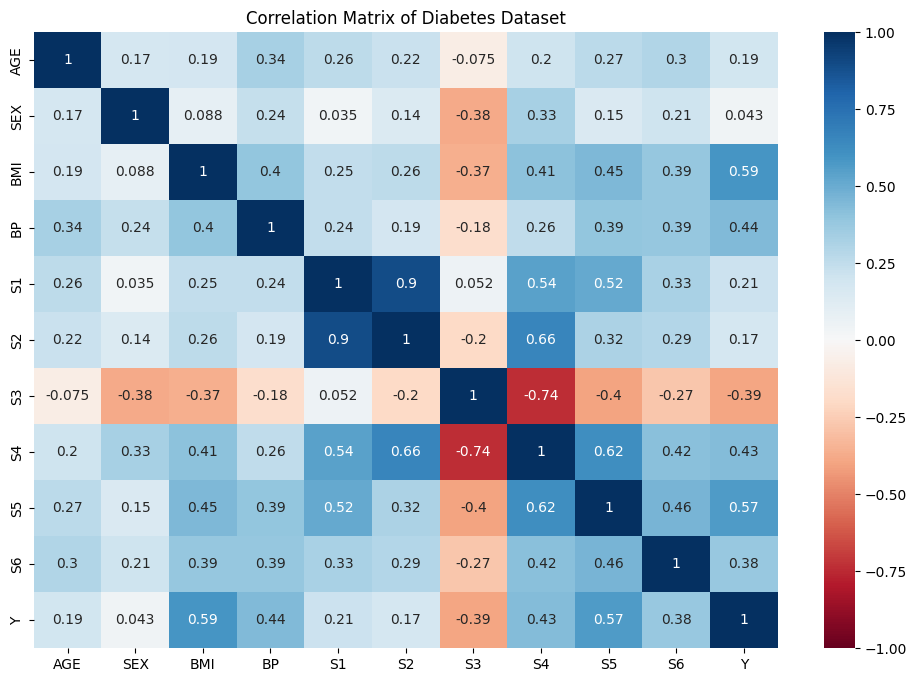

In [15]:
#Correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Diabetes Dataset")
plt.show()


In [16]:
# correlation of predictors on Y in descending order
df.corr()["Y"].sort_values(ascending=False)


,Y
Y,1.000000
BMI,0.586450
S5,0.565883
BP,0.441482
S4,0.430453
S6,0.382483
S1,0.212022
AGE,0.187889
S2,0.174054
SEX,0.043062


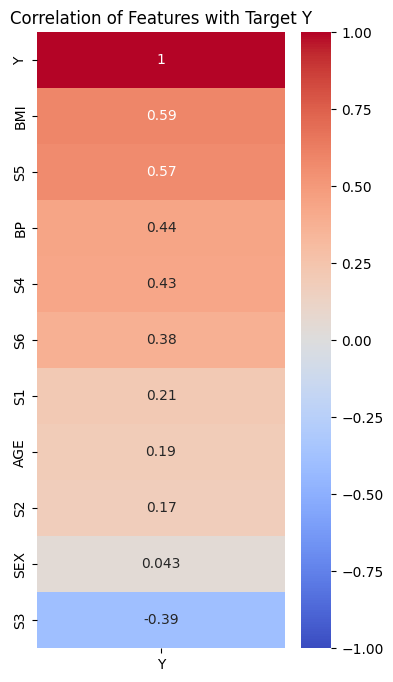

In [17]:
# correlation visualization

plt.figure(figsize=(4, 8))
sns.heatmap(df.corr()[["Y"]].sort_values(by="Y", ascending=False),
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation of Features with Target Y")
plt.show()


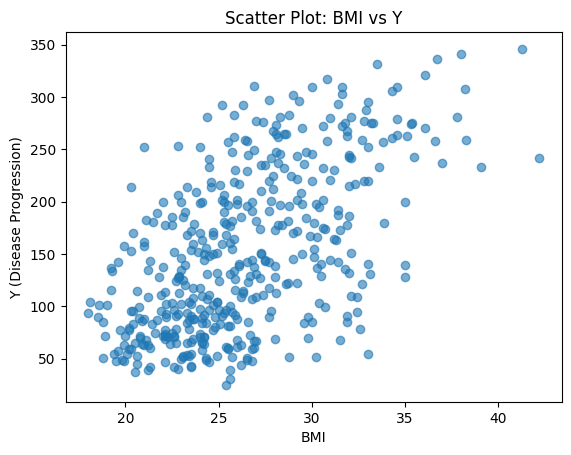

In [18]:

# scatter plot of BMI vs Y

plt.scatter(df["BMI"], df["Y"], alpha=0.6)
plt.xlabel("BMI")
plt.ylabel("Y (Disease Progression)")
plt.title("Scatter Plot: BMI vs Y")
plt.show()


## Single-Feature Performance Analysis

In this section, each predictor variable is evaluated **individually** using a simple linear regression model to assess its standalone predictive strength.

For each feature:
- A linear regression model is trained using only that feature  
- Predictions are generated on the full dataset  
- Mean Squared Error (MSE) is computed as a baseline performance measure  

This analysis helps identify which features are most informative on their own and provides insight into feature importance prior to multivariate modeling.


In [19]:
## Single feature selection


single_feature_mse = {}

X_all = df.drop(columns=["Y"])
y = df["Y"]

for col in X_all.columns:
    X = df[[col]]
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    single_feature_mse[col] = mse

single_feature_mse


{'AGE': 5720.547017205647,
 'SEX': 5918.888899586022,
 'BMI': 3890.456585461273,
 'BP': 4774.113902368687,
 'S1': 5663.315623739354,
 'S2': 5750.241102677781,
 'S3': 5005.661620710652,
 'S4': 4831.13838643409,
 'S5': 4030.998722591287,
 'S6': 5062.380594520543}

## Identifying the Best Single Predictor

Based on the single-feature regression analysis, the predictor with the **lowest Mean Squared Error (MSE)** is identified as the best standalone feature for predicting the target variable **Y**.

This step highlights which individual variable provides the strongest predictive signal when used in isolation and helps guide feature selection for subsequent modeling stages.


In [20]:
#Best single feature for prediction

best_single_feature = min(single_feature_mse, key=single_feature_mse.get)
best_single_feature


'BMI'

## Single-Feature Linear Regression (BMI → Target Variable)

In this section, a **simple linear regression model** is built using **Body Mass Index (BMI)** as the sole predictor to estimate the target variable **Y**.

The purpose of this step is to:
- Establish a **baseline model** using a single explanatory variable  
- Analyze the direct linear relationship between BMI and the target outcome  
- Understand model behavior before introducing additional features  

The dataset is split into training and testing subsets to support generalization.  
A Linear Regression model is then trained and used to generate predictions, which will later be evaluated to assess model performance and interpretability.


In [ ]:
# Single Feature Linear Regression (BMI -> Y)


# Select BMI as single feature
X = df[["BMI"]]
y = df["Y"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)





## Ordinary Least Squares (OLS) Regression – Statistical Interpretation

In this section, an **Ordinary Least Squares (OLS)** regression model is fitted using the **statsmodels** library to obtain a detailed statistical summary of the linear relationship.

Unlike scikit-learn, which focuses primarily on prediction, OLS provides:
- Estimated regression coefficients  
- Standard errors and confidence intervals  
- Hypothesis tests (t-statistics and p-values)  
- Overall model diagnostics such as R² and F-statistics  

A constant (intercept) term is explicitly added to the model to correctly estimate the baseline effect.  
The resulting summary helps assess **statistical significance, model assumptions, and interpretability** of the regression results.


In [25]:
# OLS model

import pandas as pd

# Re-define X, y, and perform train-test split for single feature (BMI) to ensure X_train and y_train are available
X = df[["BMI"]]
y = df["Y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant term
X_train_sm = sm.add_constant(X_train)

# Fit OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     202.4
Date:                Tue, 06 Jan 2026   Prob (F-statistic):           1.40e-36
Time:                        21:24:56   Log-Likelihood:                -1958.2
No. Observations:                 353   AIC:                             3920.
Df Residuals:                     351   BIC:                             3928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -131.8738     20.348     -6.481      0.0

## Generating Predictions Using the OLS Model

After fitting the OLS regression model on the training data, the model is applied to the test dataset to generate predictions.

A constant (intercept) term is added to the test features to ensure consistency with the trained OLS model.  
The predicted values are then used for performance evaluation and comparison against actual outcomes.


In [26]:
X_test_sm = sm.add_constant(X_test)
y_pred = ols_model.predict(X_test_sm)


## Model Performance Evaluation (R² and Mean Squared Error)

The performance of the regression model is evaluated using standard regression metrics:

- **Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values. Lower values indicate better predictive accuracy.
- **R² (Coefficient of Determination):** Represents the proportion of variance in the target variable explained by the model.

These metrics provide complementary perspectives on model performance


In [27]:
# R square and MSE

from sklearn.metrics import mean_squared_error, r2_score

print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))


Test MSE: 4061.8259284949268
Test R²: 0.23335039815872138


## Visualizing the Linear Regression Fit

This visualization compares the **actual test data points** with the **predicted regression line** produced by the OLS model.

- The scatter points represent observed values from the test dataset  
- The red line represents the model’s predicted relationship between BMI and the target variable  

This plot provides an intuitive assessment of how well the linear model captures the underlying trend and highlights potential deviations or patterns not explained by the model.


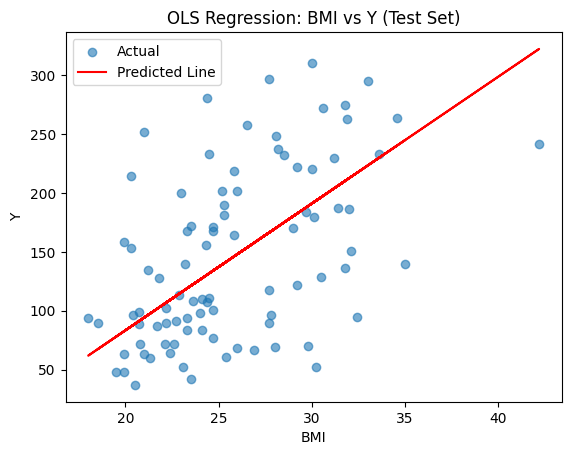

In [28]:
# linear regression plot

plt.scatter(X_test, y_test, label="Actual", alpha=0.6)
plt.plot(X_test, y_pred, color="red", label="Predicted Line")
plt.xlabel("BMI")
plt.ylabel("Y")
plt.title("OLS Regression: BMI vs Y (Test Set)")
plt.legend()
plt.show()


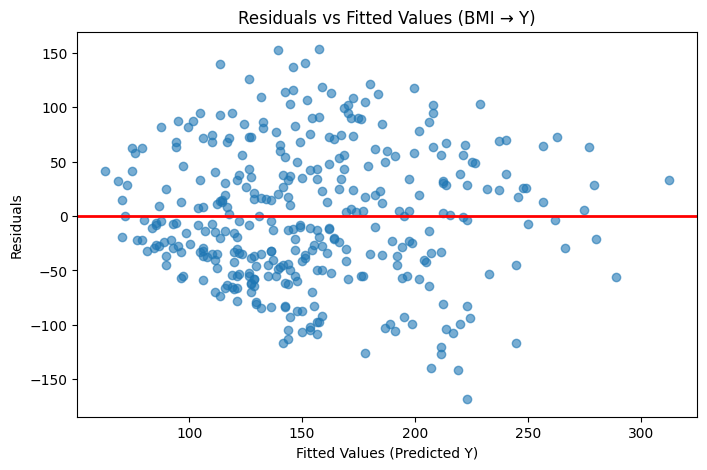

In [29]:


# Fitted values (predicted Y)
fitted = ols_model.fittedvalues

# Residuals (actual Y − predicted Y)
residuals = ols_model.resid

plt.figure(figsize=(8,5))
plt.scatter(fitted, residuals, alpha=0.6)
plt.axhline(0, color="red", linewidth=2)
plt.xlabel("Fitted Values (Predicted Y)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (BMI → Y)")
plt.show()


## Multiple Linear Regression Using BMI and S5

This section extends the previous single-feature model to a **multiple linear regression** framework by incorporating **BMI** and **S5** as predictor variables.

Including an additional feature allows the model to:
- Capture more complex relationships influencing the target variable  
- Assess the combined and individual impact of multiple predictors  
- Potentiall


In [30]:
# linear regression using BMI and S5 on Y

X = df[["BMI","S5"]]
y = df["Y"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## OLS Regression with Multiple Predictors

In this section, an **Ordinary Least Squares (OLS)** regression model is fitted using **multiple input features (BMI and S5)** to analyze their combined effect on the target variable.

A constant (intercept) term is explicitly added to the training data to ensure proper estimation of the baseline outcome.  
The OLS summary output provides detailed statistical diagnostics, including coefficient estimates, significance levels, and goodness-of-fit measures, enabling deeper interpretation of the model beyond predictive accuracy.


In [31]:
import statsmodels.api as sm

# Add constant term
X_train_sm = sm.add_constant(X_train,has_constant="add")

# Fit OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     148.1
Date:                Tue, 06 Jan 2026   Prob (F-statistic):           2.52e-47
Time:                        21:25:17   Log-Likelihood:                -1930.4
No. Observations:                 353   AIC:                             3867.
Df Residuals:                     350   BIC:                             3878.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -294.2167     28.195    -10.435      0.0

## Generating Predictions with the Multi-Feature OLS Model

After fitting the OLS regression model using multiple predictors, the trained model is applied to the test dataset to generate predictions.

A constant (intercept) term is added to the test features to maintain consistency with the model specification used during training.  
These predicted values will be used to evaluate model performance and compare results with the single-feature r


In [32]:
X_test_sm = sm.add_constant(X_test,has_constant="add")
y_pred = ols_model.predict(X_test_sm)


## Evaluating the Multi-Feature Regression Model

The performance of the multiple linear regression model is evaluated using standard regression metrics:

- **Mean Squared Error (MSE):** Quantifies the average squared difference between actual and predicted values.
- **R² (Coefficient of Determination):** Measures the proportion of variance in the target variable explained by the model.

These metrics are used to assess whether incorporating additional predictors improves model performance compared to the single-feature regression.


In [33]:
from sklearn.metrics import mean_squared_error, r2_score

print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))


Test MSE: 2901.8369415567036
Test R²: 0.4522925957397932


## Partial Regression Plots (Controlling for Other Predictors)

Partial regression plots are used to visualize the **individual effect of each predictor on the target variable while holding other predictors constant**.

In this section:
- The first plot shows the relationship between **BMI and Y**, controlling for **S5**
- The second plot shows the relationship between **S5 and Y**, controlling for **BMI**

These plots help assess:
- The unique contribution of each predictor  
- Linearity assumptions in multiple regression  
- Whether each feature adds explanatory power independent of the other  

Partial regression plots are especially useful for interpreting multi-feature linear models and validating modeling assumptions.


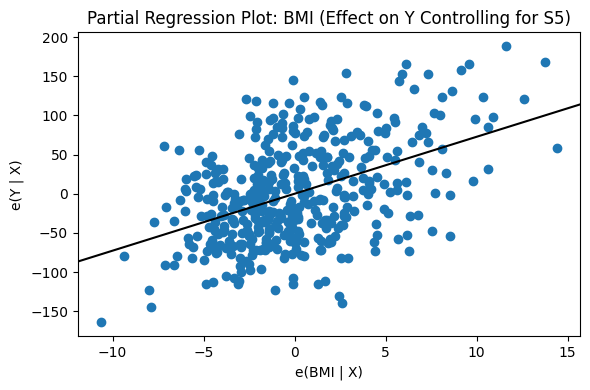

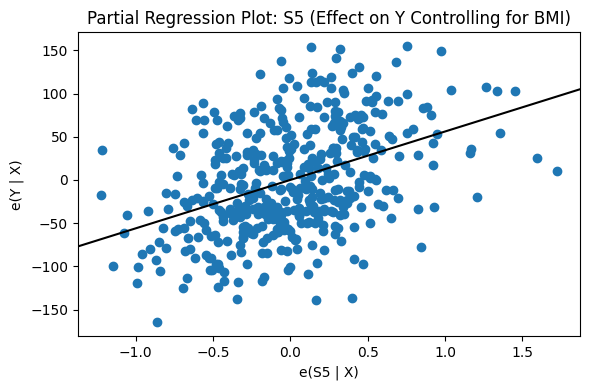

In [34]:

import statsmodels.api as sm
import matplotlib.pyplot as plt
# Partial regression plot for BMI while holding S5 constant
fig = sm.graphics.plot_partregress(endog='Y',
                             exog_i='BMI',
                             exog_others=['S5'],
                             data=df,
                            obs_labels=False)
fig.set_size_inches(6, 4)
plt.tight_layout()
plt.title("Partial Regression Plot: BMI (Effect on Y Controlling for S5)")
plt.show()

# Partial regression plot for S5 while holding BMI constant
fig = sm.graphics.plot_partregress(endog='Y',
                             exog_i='S5',
                             exog_others=['BMI'],
                             data=df,obs_labels=False)
fig.set_size_inches(6, 4)
plt.tight_layout()
plt.title("Partial Regression Plot: S5 (Effect on Y Controlling for BMI)")
plt.show()


## Residual Analysis: Model Diagnostics

Residual analysis is performed to evaluate key assumptions of the linear regression model.

This plot shows **residuals versus fitted values** for the multiple linear regression model using BMI and S5.  
It helps assess:
- Linearity of the relationship  
- Constant variance (homoscedasticity)  
- Presence of systematic patterns or outliers  

Ideally, residuals should be randomly scattered around zero with no clear structure, indicating a well-specified linear model.


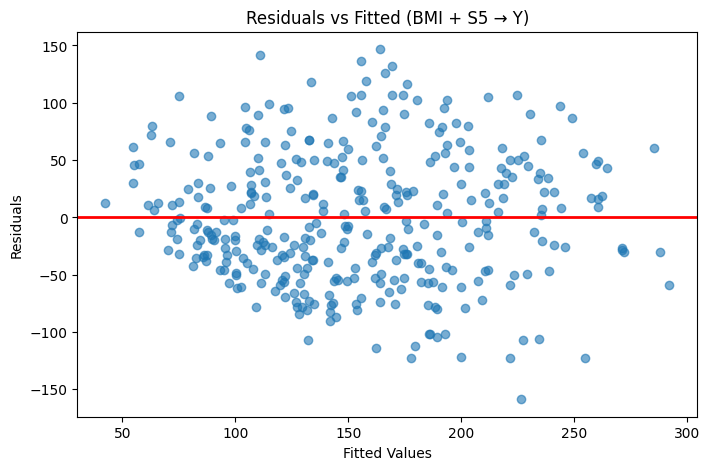

In [35]:
fitted = ols_model.fittedvalues
residuals = ols_model.resid

plt.figure(figsize=(8,5))
plt.scatter(fitted, residuals, alpha=0.6)
plt.axhline(0, color="red", linewidth=2)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (BMI + S5 → Y)")
plt.show()


## Multiple Linear Regression Using All Predictors

This section builds a **full multiple linear regression model** using **all available features** in the dataset to predict the target variable **Y**.

Here, `Y` is separated as the target, and all remaining columns are used as predictors.  
The goal is to:
- Establish a **stronger baseline** using the complete feature set  
- Evaluate overall predictive performance compared to simpler models (BMI only, BMI + S5)  
- Analyze which variables contribute most to explaining variation in **Y**

The data is split into training and testing subsets to ensure the final evaluation reflects performance on unseen data.


In [36]:
# Mulitple regression using all predictors

X = df.drop(columns=["Y"])
y = df["Y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## OLS Regression with All Predictors

In this section, an **Ordinary Least Squares (OLS)** regression model is fitted using **all available predictor variables** to explain the target variable **Y**.

A constant (intercept) term is explicitly added to the training data to ensure correct estimation of the baseline outcome.  
The OLS summary provides a comprehensive statistical overview, including coefficient estimates, statistical significance, and overall model fit, allowing for detailed interpretation of each predictor’s contribution.


In [37]:
# Add constant term
X_train_sm = sm.add_constant(X_train,has_constant="add")

# Fit OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     38.25
Date:                Tue, 06 Jan 2026   Prob (F-statistic):           5.41e-50
Time:                        21:25:33   Log-Likelihood:                -1906.1
No. Observations:                 353   AIC:                             3834.
Df Residuals:                     342   BIC:                             3877.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -341.3782     74.073     -4.609      0.0

## Generating Predictions with the Full Regression Model

After fitting the OLS model using all predictors, the trained model is applied to the test dataset to generate predictions.

A constant (intercept) term is added to the test features to maintain consistency with the model specification used during training.  
These predictions will be used to evaluate overall model performance and compare results across different regression configurations.


In [38]:
X_test_sm = sm.add_constant(X_test,has_constant="add")
y_pred = ols_model.predict(X_test_sm)


## Evaluating the Full Regression Model

The performance of the full multiple linear regression model is evaluated using standard regression metrics:

- **Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values, reflecting overall prediction error.
- **R² (Coefficient of Determination):** Indicates the proportion of variance in the target variable explained by all predictors combined.

These metrics help assess whether using the complete feature set provides meaningful improvement over simpler regression models.


In [39]:
from sklearn.metrics import mean_squared_error, r2_score

print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))


Test MSE: 2900.1936284934886
Test R²: 0.45260276297191804


## Partial Regression Plots for All Predictors

This section visualizes **partial regression plots for all predictors** in the full multiple linear regression model.

Each plot illustrates the relationship between an individual predictor and the target variable **Y**, while controlling for the effects of all other predictors in the model.

These plots help:
- Assess the **unique contribution** of each feature  
- Evaluate linearity assumptions in the full model  
- Identify predictors with weak, strong, or non-linear effects  

The grid of partial regression plots provides a comprehensive interpretability view of the multivariate regression model.


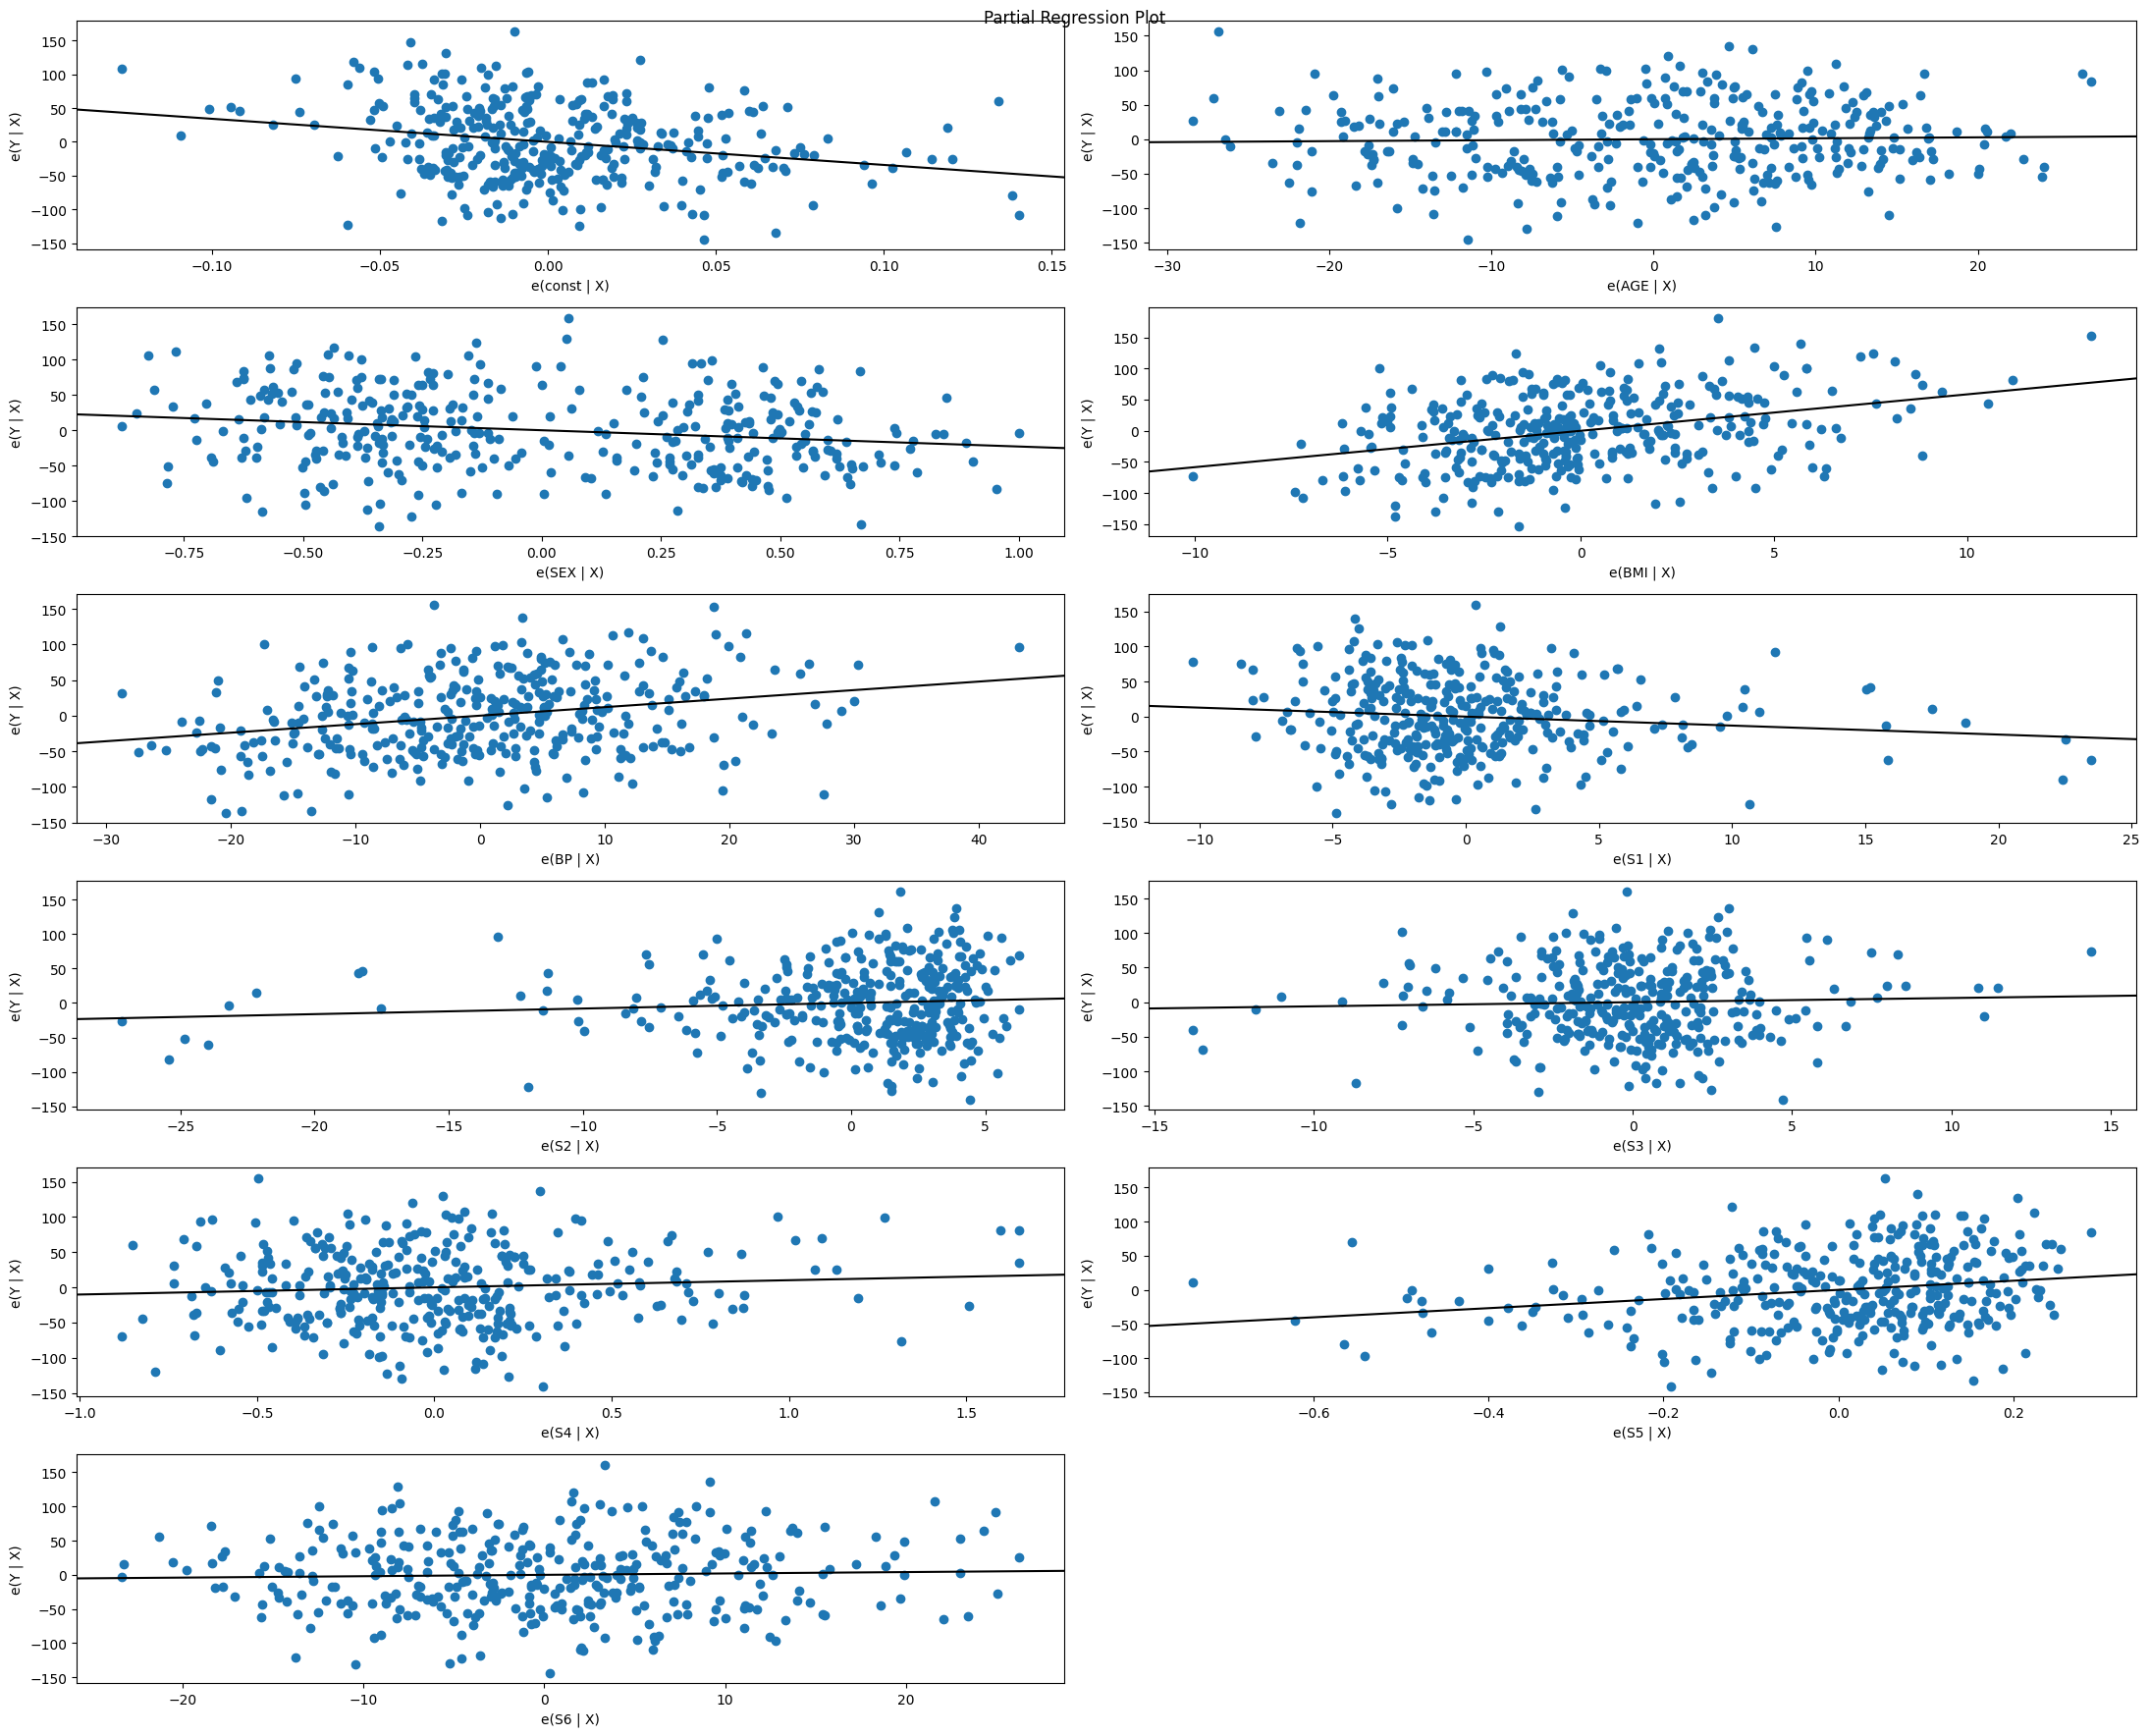

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(22, 18))
sm.graphics.plot_partregress_grid(ols_model, fig=fig)
plt.tight_layout()
plt.show()


## Evaluating Model Sensitivity to Training Set Size

In this section, the effect of **training sample size** on model performance is analyzed.

The full set of predictor variables is used to build the regression model, while the target variable **Y** is predicted using varying proportions of training data.  
By systematically changing the number of training samples, this analysis helps assess:
- Model stability and robustness  
- Sensitivity to data availability  
- Potential overfitting or underfitting behavior  

This experiment provides insight into how model performance evolves as more training data becomes available.


In [41]:
# varying n_train

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Prepare data
X = df.drop(columns=["Y"])   # all predictors
y = df["Y"]                  # target


## Defining Training Set Sizes

A set of different training sample sizes is defined to systematically evaluate how model performance changes with increasing amounts of training data.

These values represent progressively larger subsets of the dataset and will be used to compare prediction error across different training scenarios.


In [42]:
train_sizes = [20, 50, 100, 200]
results = []

## Training Size Experiment: Model Fitting and Evaluation

This loop trains and evaluates the regression model using **different fixed training set sizes** to study how performance changes as more data becomes available.

For each specified training size:
1. A fixed number of samples is used for model training  
2. An OLS regression model is fitted on the training subset  
3. Predictions are generated for both training and validation data  
4. Mean Squared Error (MSE) is computed for training and validation sets  

Comparing training and validation errors across sample sizes helps identify trends related to **overfitting, underfitting, and model generalization**.


In [43]:
for n in train_sizes:
    print(f"\n--- n_train = {n} ---")

    # 1. Split: EXACT n_train samples for training
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, train_size=n, random_state=42
    )

    # 2. Add constant
    X_train_sm = sm.add_constant(X_train)
    X_valid_sm = sm.add_constant(X_valid, has_constant="add")

    # 3. Fit OLS model on n samples
    ols_model = sm.OLS(y_train, X_train_sm).fit()

    # 4. Predictions
    y_train_pred = ols_model.predict(X_train_sm)
    y_valid_pred = ols_model.predict(X_valid_sm)

    # 5. Compute MSEs
    train_MSE = mean_squared_error(y_train, y_train_pred)
    valid_MSE = mean_squared_error(y_valid, y_valid_pred)

    # 6. Store results
    results.append([n, train_MSE, valid_MSE])

    # Print results
    print("Training MSE:", train_MSE)
    print("Validation MSE:", valid_MSE)



--- n_train = 20 ---
Training MSE: 2066.506296480685
Validation MSE: 15905.595732973716

--- n_train = 50 ---
Training MSE: 2863.6151954584984
Validation MSE: 3907.016928729859

--- n_train = 100 ---
Training MSE: 3150.5145737900975
Validation MSE: 3423.4461598267276

--- n_train = 200 ---
Training MSE: 2854.949838581657
Validation MSE: 3014.919458186786


## Aggregating Training Size Experiment Results

The results from the training size experiment are consolidated into a structured table for easier analysis and comparison.

This DataFrame summarizes:
- The number of training samples used  
- Corresponding training Mean Squared Error (MSE)  
- Corresponding validation Mean Squared Error (MSE)  

Presenting the results in tabular form enables clearer inspection of performance trends as training data size increases.


In [44]:
#  Convert to DataFrame
results_df = pd.DataFrame(
    results, columns=["n_train", "Train MSE", "Validation MSE"]
)

results_df


,n_train,Train MSE,Validation MSE
0,20,2066.506296,15905.595733
1,50,2863.615195,3907.016929
2,100,3150.514574,3423.446160
3,200,2854.949839,3014.919458


## Non-Linear Regression Using XGBoost

In this section, a **tree-based gradient boosting model (XGBoost Regressor)** is introduced to model potentially **non-linear relationships** between the predictors and the target variable **Y**.

Unlike linear regression, XGBoost:
- Captures non-linear interactions automatically  
- Handles feature interactions without explicit specification  
- Often achieves stronger predictive performance on complex datasets  

All available features are used as inputs, and the target variable is defined separately.  
This model serves as a performance benchmark against earlier linear regression approaches.


In [45]:

X = df.drop(columns=["Y"])   # all features
y = df["Y"]


## Comparing OLS and XGBoost Across Training Set Sizes

This section compares the performance of **Ordinary Least Squares (OLS)** regression and **XGBoost** regression across varying training set sizes.

By evaluating both models using the same subsets of training data, this analysis helps:
- Understand how linear and non-linear models scale with data availability  
- Compare generalization behavior under limited and increasing data scenarios  
- Identify which modeling approach is more robust for this dataset  

The experiment uses identical training sizes to ensure a fair and consistent comparison.


In [46]:
#Compare OLS vs XGBoost
train_sizes = [20, 50, 100, 200]
results = []


## OLS vs XGBoost: Model Training and Performance Comparison

This loop trains and evaluates **Ordinary Least Squares (OLS)** and **XGBoost regression models** using the same training subsets to enable a fair comparison.

For each specified training size:
1. A fixed number of samples is used for training, with the remainder used for validation  
2. An OLS model is fitted to capture linear relationships and provide interpretability  
3. An XGBoost model is trained to capture non-linear patterns and feature interactions  
4. Mean Squared Error (MSE) is computed for both training and validation sets  

Comparing training and validation errors across models and sample sizes helps evaluate **generalization behavior, robustness to small datasets, and performance trade-offs between linear and non-linear models**.


In [47]:
for n in train_sizes:
    print(f"\n===== n_train = {n} =====")

    # --------------------------
    # 1. Train/Validation Split
    # --------------------------
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, train_size=n, random_state=42
    )

    # --------------------------
    # 2. OLS MODEL
    # --------------------------
    X_train_sm = sm.add_constant(X_train)
    X_valid_sm = sm.add_constant(X_valid, has_constant="add")

    ols_model = sm.OLS(y_train, X_train_sm).fit()

    y_train_pred_ols = ols_model.predict(X_train_sm)
    y_valid_pred_ols = ols_model.predict(X_valid_sm)

    ols_train_MSE = mean_squared_error(y_train, y_train_pred_ols)
    ols_valid_MSE = mean_squared_error(y_valid, y_valid_pred_ols)

    # --------------------------
    # 3. XGBOOST MODEL
    # --------------------------
    xgb = XGBRegressor(
        max_depth=3,
        n_estimators=300,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42
    )

    xgb.fit(X_train, y_train)

    y_train_pred_xgb = xgb.predict(X_train)
    y_valid_pred_xgb = xgb.predict(X_valid)

    xgb_train_MSE = mean_squared_error(y_train, y_train_pred_xgb)
    xgb_valid_MSE = mean_squared_error(y_valid, y_valid_pred_xgb)

    # --------------------------
    # 4. Store Comparison
    # --------------------------
    results.append([
        n,
        ols_train_MSE, ols_valid_MSE,
        xgb_train_MSE, xgb_valid_MSE
    ])

 # --------- Print results ----------
    print(f"OLS Train MSE: {ols_train_MSE:.2f}")
    print(f"OLS Valid MSE: {ols_valid_MSE:.2f}")
    print(f"XGB Train MSE: {xgb_train_MSE:.2f}")
    print(f"XGB Valid MSE: {xgb_valid_MSE:.2f}")



===== n_train = 20 =====
OLS Train MSE: 2066.51
OLS Valid MSE: 15905.60
XGB Train MSE: 0.01
XGB Valid MSE: 5176.76

===== n_train = 50 =====
OLS Train MSE: 2863.62
OLS Valid MSE: 3907.02
XGB Train MSE: 1.98
XGB Valid MSE: 4569.06

===== n_train = 100 =====
OLS Train MSE: 3150.51
OLS Valid MSE: 3423.45
XGB Train MSE: 38.71
XGB Valid MSE: 3757.85

===== n_train = 200 =====
OLS Train MSE: 2854.95
OLS Valid MSE: 3014.92
XGB Train MSE: 190.57
XGB Valid MSE: 3756.18


## Final Comparison Results: OLS vs XGBoost

The results from the comparative experiment are consolidated into a final summary table.

This table reports:
- Training set size (`n_train`)
- Training and validation Mean Squared Error (MSE) for **OLS regression**
- Training and validation Mean Squared Error (MSE) for **XGBoost regression**

Presenting the results in this format enables a clear, side-by-side comparison of model performance and generalization behavior across different data availability scenarios.


In [48]:
# Final results table
results_df = pd.DataFrame(results, columns=[
    "n_train",
    "OLS_Train_MSE", "OLS_Valid_MSE",
    "XGB_Train_MSE", "XGB_Valid_MSE"
])

results_df

,n_train,OLS_Train_MSE,OLS_Valid_MSE,XGB_Train_MSE,XGB_Valid_MSE
0,20,2066.506296,15905.595733,0.012955,5176.764160
1,50,2863.615195,3907.016929,1.981500,4569.060547
2,100,3150.514574,3423.446160,38.707203,3757.847900
3,200,2854.949839,3014.919458,190.567429,3756.181885
